In [123]:
using DifferentialEquations
using Plots

### Основная формула

In [124]:
function mutualism_1!(du, u, p, t)
    X, Y = u
    c1, c2, p1, p2 = p

    du[1] = -c1*X + p1*X*Y
    du[2] = -c2*Y + p2*X*Y
end

mutualism_1! (generic function with 1 method)

#### Случай, когда начальные плотности достаточно велики

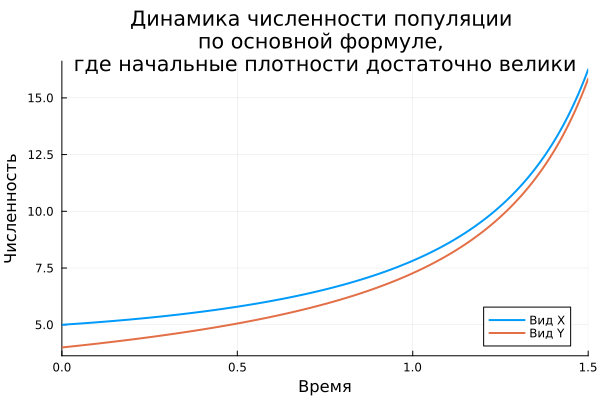

In [125]:
X_0 = 5.0
Y_0 = 4.0
time = (0.0, 1.5)
params = [0.6, 0.6, 0.2, 0.2]

prob = ODEProblem(mutualism_1!, [X_0, Y_0], time, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plt1 = plot(sol,
            linewidth=2,
            xlabel="Время",
            ylabel="Численность",
            label=["Вид X" "Вид Y"],
            title="Динамика численности популяции \nпо основной формуле, \nгде начальные плотности достаточно велики",
            legend=:bottomright)

# savefig(plt1, "image/mutualism_1_1.png")

#### Случай, когда одна из популяций с маленькой начальной плотностью

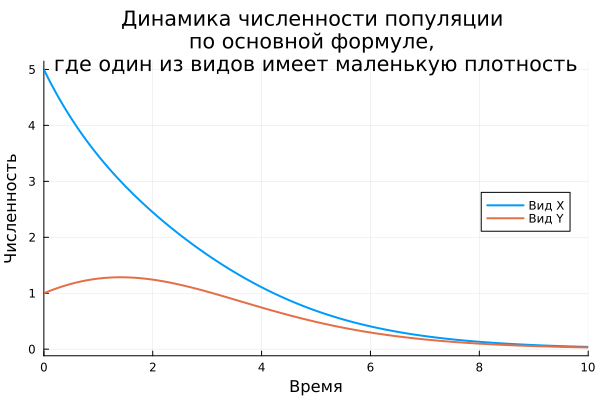

In [126]:
X_0 = 5.0
Y_0 = 1.0
time = (0.0, 10.0)
params = [0.6, 0.6, 0.2, 0.2]

prob = ODEProblem(mutualism_1!, [X_0, Y_0], time, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plt1 = plot(sol,
            linewidth=2,
            xlabel="Время",
            ylabel="Численность",
            label=["Вид X" "Вид Y"],
            title="Динамика численности популяции \nпо основной формуле, \nгде один из видов имеет маленькую плотность",
            legend=:right)

# savefig(plt1, "image/mutualism_1_2.png")

### Добавление фактора насыщения

In [127]:
function mutualism_2!(du, u, p, t)
    X, Y = u
    c1, c2, p1, p2, d1, d2 = p

    du[1] = -c1*X + p1*X*Y/(1+d1*Y)
    du[2] = -c2*Y + p2*X*Y/(1+d2*X)
end

mutualism_2! (generic function with 1 method)

#### Случай, когда начальные плотности достаточно велики с насыщением


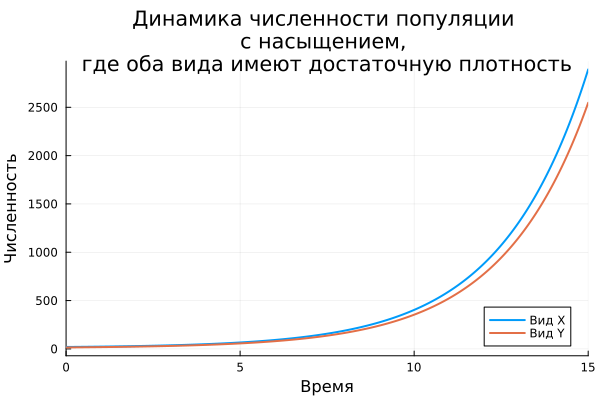

In [128]:
X_0 = 20.0
Y_0 = 15.0
time = (0.0, 15.0)
params = (0.6, 0.6, 0.2, 0.2, 0.2, 0.2) # params (c1, с2, p1, p2, d1, d2)

prob = ODEProblem(mutualism_2!, [X_0, Y_0], time, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plt1 = plot(sol,
            linewidth=2,
            xlabel="Время",
            ylabel="Численность",
            label=["Вид X" "Вид Y"],
            title="Динамика численности популяции \nс насыщением, \nгде оба вида имеют достаточную плотность",
            legend=:bottomright)

# savefig(plt1, "image/mutualism_2_3.png")

#### Случай, когда одна из популяций с маленькой начальной плотностью с насыщением

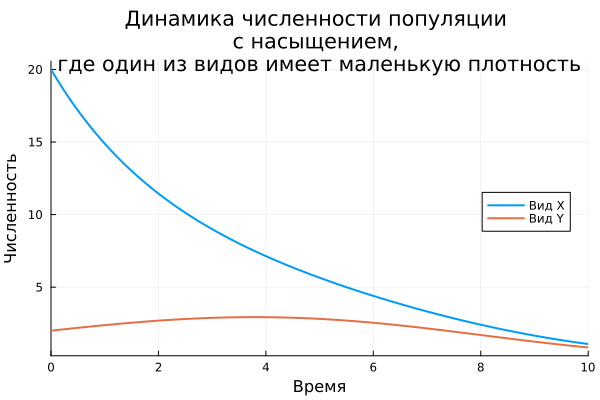

In [137]:
X_0 = 20.0
Y_0 = 2.0
time = (0.0, 10.0)
params = (0.6, 0.6, 0.2, 0.2, 0.2, 0.2) # params (c1, с2, p1, p2, d1, d2)

prob = ODEProblem(mutualism_2!, [X_0, Y_0], time, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plt1 = plot(sol,
            linewidth=2,
            xlabel="Время",
            ylabel="Численность",
            label=["Вид X" "Вид Y"],
            title="Динамика численности популяции \nс насыщением, \nгде один из видов имеет маленькую плотность",
            legend=:right)

# savefig(plt1, "image/mutualism_2_4.png")

### Дополнение формулы фактором внутривидовой конкуренции

In [130]:
function mutualism_3!(du, u, p, t)
    X, Y = u
    c1, c2, p1, p2, d1, d2, e1, e2 = p

    du[1] = -c1*X + p1*X*Y/(1+d1*Y) - e1*X*X
    du[2] = -c2*Y + p2*X*Y/(1+d2*X) - e2*Y*Y
end

mutualism_3! (generic function with 1 method)

#### Случай, когда обе популяции имеют достаточную плотность с внутривидовой конкуренцией

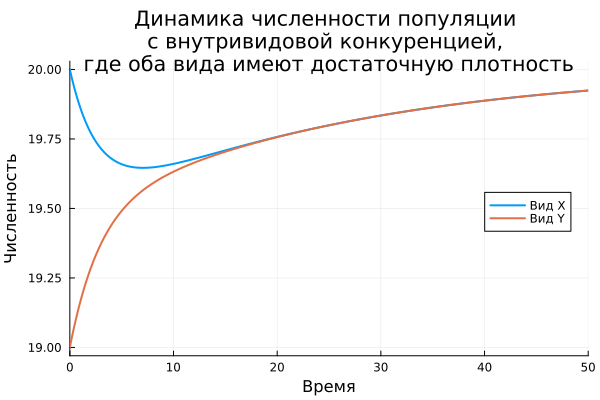

In [131]:
X_0 = 20.0
Y_0 = 19.0
time = (0.0, 50.0)
params = (0.6, 0.6, 0.2, 0.2, 0.2, 0.2, 0.01, 0.01)

prob = ODEProblem(mutualism_3!, [X_0, Y_0], time, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plt1 = plot(sol,
            linewidth=2,
            xlabel="Время",
            ylabel="Численность",
            label=["Вид X" "Вид Y"],
            title="Динамика численности популяции \nс внутривидовой конкуренцией, \nгде оба вида имеют достаточную плотность",
            legend=:right)

# savefig(plt1, "image/mutualism_3_5.png")

#### Случай, когда одна из популяций с маленькой начальной плотностью с внутривидовой конкуренцией

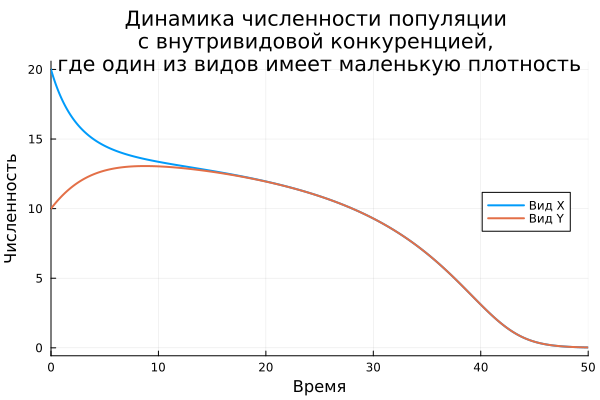

In [132]:
X_0 = 20.0
Y_0 = 10.0
time = (0.0, 50.0)
params = (0.6, 0.6, 0.2, 0.2, 0.2, 0.2, 0.01, 0.01)

prob = ODEProblem(mutualism_3!, [X_0, Y_0], time, params)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plt1 = plot(sol,
            linewidth=2,
            xlabel="Время",
            ylabel="Численность",
            label=["Вид X" "Вид Y"],
            title="Динамика численности популяции \nс внутривидовой конкуренцией, \nгде один из видов имеет маленькую плотность",
            legend=:right)

# savefig(plt1, "image/mutualism_3_6.png")